## Skoltech
## Intro to data science, fall 2021
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSfAQzhQGmdCYLtaeeaAn2mgNut5HO4U6l3G1KUbBO0qDtA7FA/viewform

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza:https://piazza.com/class/ku068l4dg0068n

## Dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

**People**

-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if customer complained in the last 2 years, 0 otherwise


**Products**

-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Behavior**

-   NumWebPurchases: Number of purchases made through the company’s web site
-   NumCatalogPurchases: Number of purchases made using a catalogue
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to company’s web site in the last month
-   NumDealsPurchases: Number of purchases made with a discount


#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from jupyterthemes import jtplot
jtplot.style()

#### Read the data

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

In [4]:
pd.set_option('display.max_columns', 30)

## 1. Data exploration

Let's take a closer look at the data.

In [5]:
df

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1973,Graduation,Married,0,1,2019-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,3,11,0
4001,1952,PhD,Together,2,1,2020-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,3,11,0
7270,1987,Graduation,Divorced,0,0,2020-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,3,11,0


In [6]:
df.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1974.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,3.0,11.0,0.149107
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.0,0.0,0.356274
min,1899.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1965.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000
50%,1976.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000
75%,1983.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,0.000000
max,2002.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2018-08-31
freq,1127,864,12


In [8]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

### Q1.1

#### How many columns in the dataset?

In [10]:
len(df.columns)

22

### Q1.2

#### How many unique marital statuses are there?

In [11]:
df.Marital_Status.nunique()

8

### Q1.3
#### What is the average age, if we assume now it is 2021? E.g. if we would have two people born in 2001 and 1999, the average age would be 21. Please answer with an integer.

In [12]:
2021 - df.Year_Birth.mean()

46.19419642857133

### Q1.4
#### There are some columns related to spendings by category, they are starting with 'Mnt': MntWines, MntFruits, etc. In which category people spent the most on average?

In [13]:
df.loc[:, df.columns.str.startswith('Mnt')].mean()

MntWines            303.935714
MntFruits            26.302232
MntMeatProducts     166.950000
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntGoldProds         44.021875
dtype: float64

### Q1.5

There are columns describing how customers make their orders, these columns start with num, e.g. 'NumDealsPurchases',
 or 'NumWebPurchases'. Build a histogram for the number of web visits (NumWebVisitsMonth). What is the 'most popular' number of visits, i.e. what number of visits encounters most often in the column?

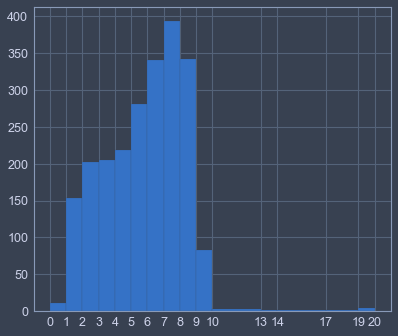

In [14]:
bins = sorted(df.NumWebVisitsMonth.unique())
plt.hist(df.NumWebVisitsMonth, bins=bins)
plt.gca().set_xticks(bins)
plt.gca().set_xticklabels(bins);

In [15]:
df.NumWebVisitsMonth.mode()

0    7
dtype: int64

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for all the 'Num..' columns with 'AcceptedCmp' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how customers with different behavior patterns react to the marketing proposals. Note, to use the column as hue, it should be passed with the rest of the columns; also you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) The people, who don't visit web site don't buy with a discount
- (b) All the people who often visit the website buy a lot online
- (c) People, who buy with a discount, much more often accept marketing campaign
- (d) There is not any clear dependency between web visits and the number of catalog purchases

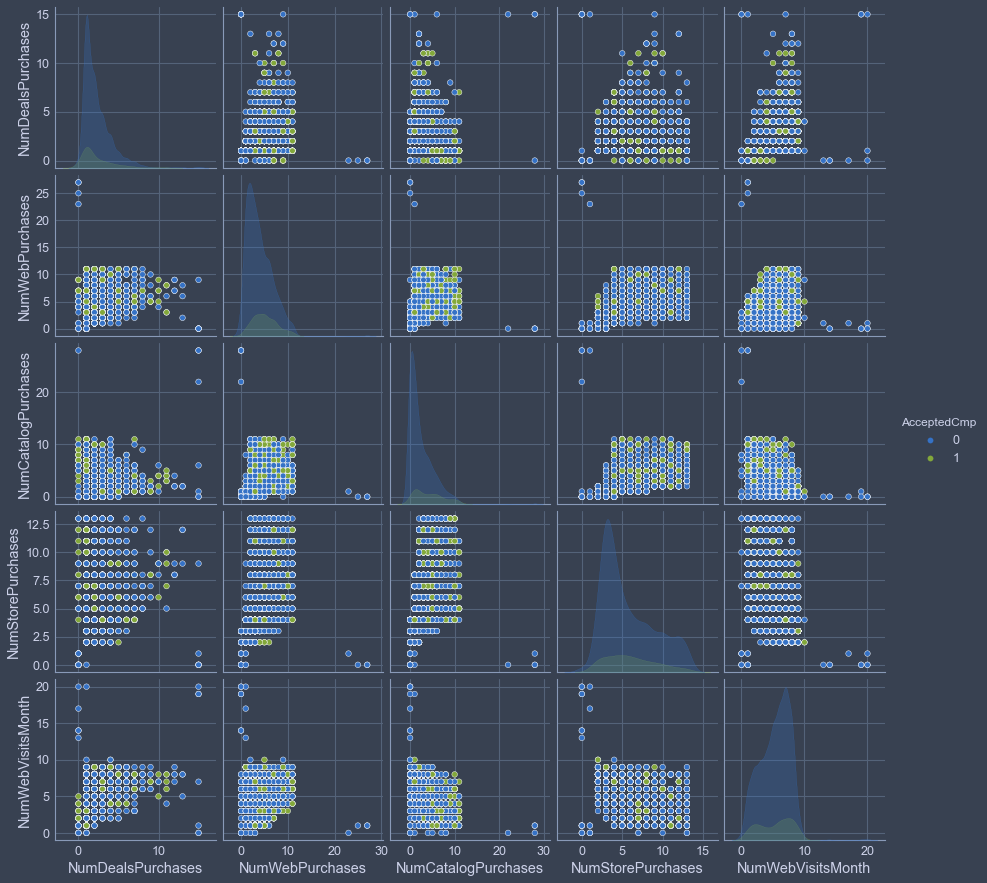

In [16]:
numCols = list(df.columns[df.columns.str.startswith('Num')])
sns.pairplot(
    df,
    hue='AcceptedCmp',
    vars=numCols,
    kind='scatter',
#     plot_kws={'alpha': .2},
);

In [17]:
df.NumWebVisitsMonth.mean(), df.NumWebPurchases.mean()

(5.316517857142857, 4.084821428571429)

In [18]:
df.NumDealsPurchases.mean()

2.325

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for teen at home ('Teenhome') and kids at home ('Kidhome'). How many customers have 2 kids and a single teenager?

In [19]:
pd.crosstab(df.Teenhome, df.Kidhome)

Kidhome,0,1,2
Teenhome,,,
0,638,503,17
1,625,374,31
2,30,22,0


### Q1.8
There is a 'Dt_Customer' column with a customer registration date. In which month there were a maximum number of registrations? Answer with the name, i.e. 'January'. Hint: you probably want to convert the column to datetime from string.

In [20]:
df.Dt_Customer = df.Dt_Customer.apply(pd.to_datetime)

In [21]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
AcceptedCmp                     int64
dtype: object

In [22]:
df.Dt_Customer.dt.month_name().describe()

count       2240
unique        12
top       August
freq         211
Name: Dt_Customer, dtype: object

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that has the same value for all the people and they don't have a description in the sections above. Let's drop them. As an answer, write the names of these columns divided by a comma.

In [23]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


In [24]:
df.drop(labels=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [25]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0


### Q2.2
As we could see before, there are some strange rare marital statuses. We going to leave only three options - 'Married', 'Together' and 'Single'. All other options should be changed to 'Single'. How many people are now in this category?

In [26]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [27]:
optionsToLeave = df.Marital_Status.isin({'Married', 'Together', 'Single'})
df.loc[~optionsToLeave, 'Marital_Status'] = 'Single'

In [28]:
df.Marital_Status.value_counts()

Married     864
Single      796
Together    580
Name: Marital_Status, dtype: int64

### Q2.3

Now it's time to talk about the task for today. Our big retail company "Y6" want to launch a marketing campaign, but we want to make the marketing proposal only to people, who would accept it with the high probability. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'AcceptedCmp' column) and data (the rest of the columns). How many positive labels are there in target?


In [29]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0


In [30]:
target = df.AcceptedCmp
target.value_counts()

0    1906
1     334
Name: AcceptedCmp, dtype: int64

In [31]:
data = df.drop('AcceptedCmp', axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
ID,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0


### Q2.4

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 42 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target,
    test_size=.3,
    random_state=42,
    shuffle=True,
    stratify=target,
)

In [34]:
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((1568, 19), (672, 19), (1568,), (672,))

In [35]:
target_test.value_counts()

0    572
1    100
Name: AcceptedCmp, dtype: int64

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, and classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form, e.g. `Dt_Customer` as a date or `Education` as categorical, so let's make a copy of x with the following columns for the section:

'Year_Birth', 'Kidhome',
'Teenhome',  'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'

In [36]:
X_num_train = data_train.drop(
    labels=['Education', 'Marital_Status', 'Dt_Customer'],
    axis=1,
)
X_num_test = data_test.drop(
    labels=['Education', 'Marital_Status', 'Dt_Customer'],
    axis=1,
)

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [38]:
clf = LogisticRegression(max_iter=5000)
clf.fit(X_num_train, target_train)

LogisticRegression(max_iter=5000)

In [39]:
target_pred = clf.predict(X_num_test)

In [40]:
f1_score(target_test, target_pred)

0.27067669172932335

### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf = KNeighborsClassifier()

In [43]:
clf.fit(X_num_train, target_train)

KNeighborsClassifier()

In [44]:
target_pred = clf.predict(X_num_test)

In [45]:
f1_score(target_test, target_pred)

0.26666666666666666

### Q3.3

Build a random forest classifier. What is the f1_score for the model?

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier(random_state=42)

In [48]:
clf.fit(X_num_train, target_train)

RandomForestClassifier(random_state=42)

In [49]:
target_pred = clf.predict(X_num_test)

In [50]:
f1_score(target_test, target_pred)

0.3582089552238806

### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. What is the f1 score for the model trained on the full train dataset with this regularization?

In [51]:
from sklearn.model_selection import GridSearchCV, KFold

In [52]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = LogisticRegression(max_iter=5000)

In [53]:
start, stop = 1, 4
paramGrid = {
    'C': np.logspace(start, stop, num=stop - start + 1)
}

In [54]:
gridSearch = GridSearchCV(clf, param_grid=paramGrid, cv=cv)

In [55]:
gridSearch.fit(X_num_train, target_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([   10.,   100.,  1000., 10000.])})

In [56]:
gridSearch.best_estimator_

LogisticRegression(C=10.0, max_iter=5000)

In [57]:
gridSearch.best_score_

0.8628721434240247

In [58]:
clf = gridSearch.best_estimator_

In [59]:
clf.fit(X_num_train, target_train)

LogisticRegression(C=10.0, max_iter=5000)

In [60]:
target_pred = clf.predict(X_num_test)

In [61]:
f1_score(target_test, target_pred)

0.27067669172932335

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [62]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = KNeighborsClassifier()

In [63]:
paramGrid = {
    'n_neighbors': range(2, 10, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, np.inf]
}

In [64]:
gridSearch = GridSearchCV(clf, param_grid=paramGrid, cv=cv)

In [65]:
gridSearch.fit(X_num_train, target_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10, 2), 'p': [1, 2, inf],
                         'weights': ['uniform', 'distance']})

In [66]:
gridSearch.best_estimator_

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [67]:
gridSearch.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

In [68]:
gridSearch.best_score_

0.8533220732178833

In [69]:
clf = gridSearch.best_estimator_

In [70]:
clf.fit(X_num_train, target_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [71]:
target_pred = clf.predict(X_num_test)

In [72]:
f1_score(target_test, target_pred)

0.33333333333333337

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [73]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = RandomForestClassifier(random_state=42)

In [74]:
paramGrid = {
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'log2'],
}

In [75]:
gridSearch = GridSearchCV(clf, param_grid=paramGrid, cv=cv)

In [76]:
gridSearch.fit(X_num_train, target_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'log2'],
                         'n_estimators': range(50, 300, 50)})

In [77]:
gridSearch.best_estimator_

RandomForestClassifier(n_estimators=150, random_state=42)

In [78]:
gridSearch.best_score_

0.8730917156753015

In [79]:
clf = gridSearch.best_estimator_

In [80]:
clf.fit(X_num_train, target_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [81]:
target_pred = clf.predict(X_num_test)
f1_score(target_test, target_pred)

0.373134328358209

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. 

What is the maximum value of MntWines now in the test set?

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
numCols = [
    'Recency',
    'Year_Birth',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]
len(numCols)

13

In [84]:
numData = df.loc[:, numCols]
scaler = StandardScaler().fit(df.loc[:, numCols])

In [85]:
numData.loc[:, :] = scaler.transform(df.loc[:, numCols])

In [86]:
numData.MntWines.describe()

count    2.240000e+03
mean    -9.605412e-17
std      1.000223e+00
min     -9.031668e-01
25%     -8.325919e-01
50%     -3.875991e-01
75%      5.952483e-01
max      3.533390e+00
Name: MntWines, dtype: float64

In [87]:
numData.MntWines.max()

3.533389791120421

### Q4.2
We have two categorical columns - education and marital status. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Education' and 'Marital_Status' columns.

How many columns do we have now?

In [88]:
catCols = ['Education', 'Marital_Status']

In [89]:
catData = pd.get_dummies(
    df.loc[:, catCols],
    prefix=catCols,
    columns=catCols,
)

In [90]:
catData

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
ID,,,,,,,,
5524,0,0,1,0,0,0,1,0
2174,0,0,1,0,0,0,1,0
4141,0,0,1,0,0,0,0,1
6182,0,0,1,0,0,0,0,1
5324,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
10870,0,0,1,0,0,1,0,0
4001,0,0,0,0,1,0,0,1
7270,0,0,1,0,0,0,1,0


In [91]:
data_pp = df.copy()
data_pp.loc[:, numCols] = numData
data_pp[catData.columns] = catData
data_pp.drop(labels=catCols, inplace=True, axis=1)

In [92]:
data_pp.head()

,Year_Birth,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,-0.985345,0,0,2018-04-09,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,1,0,0,1,0,0,0,1,0
2174,-1.235733,1,1,2020-08-03,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,1,0,0,0,1,0
4141,-0.317643,0,0,2019-08-21,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,1,0,0,0,0,1
6182,1.268149,1,0,2020-10-02,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,1,0,0,0,0,1
5324,1.017761,1,0,2020-01-19,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,1,1,0,0


In [93]:
data_pp.shape

(2240, 26)

### Q4.3 
We have a datetime column - customer registration date `Dt_Customer`. We can't use it directly, but we could use some derivative features. Let's create new columns 'recent_customer' with value `1` if a user was registered after `01/06/2020` and `0` otherways. The original `Dt_Customer` column should be dropped. How many recent customers do we have in the train set?

Hints: you can use `pd.to_datetime` for the column and `datetime.datetime` to create a new date.

In [94]:
data_pp['recent_customer'] =\
    data_pp.Dt_Customer > pd.to_datetime('2020/06/01')

In [95]:
data_pp

,Year_Birth,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,-0.985345,0,0,2018-04-09,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,1,0,0,1,0,0,0,1,0,False
2174,-1.235733,1,1,2020-08-03,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,1,0,0,0,1,0,True
4141,-0.317643,0,0,2019-08-21,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,1,0,0,0,0,1,False
6182,1.268149,1,0,2020-10-02,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,1,0,0,0,0,1,True
5324,1.017761,1,0,2020-01-19,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,1,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,-0.150717,0,1,2019-06-13,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,0,0,0,0,1,0,0,1,0,0,False
4001,-1.903435,2,1,2020-10-06,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,0,0,0,0,0,0,1,0,0,1,True
7270,1.017761,0,0,2020-01-25,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,0,0,0,0,1,0,0,0,1,0,False


In [96]:
data_pp.drop(labels='Dt_Customer', inplace=True, axis=1)

In [97]:
data_pp.recent_customer.value_counts()

False    2059
True      181
Name: recent_customer, dtype: int64

### Q4.4

To check the effects of the modification, train the logistic regression with an optimal C. What is the f1 score now?

In [98]:
data_pp.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,-0.985345,0,0,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,1,0,0,1,0,0,0,1,0,False
2174,-1.235733,1,1,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,1,0,0,0,1,0,True
4141,-0.317643,0,0,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,1,0,0,0,0,1,False
6182,1.268149,1,0,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,1,0,0,0,0,1,True
5324,1.017761,1,0,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,1,1,0,0,False


In [99]:
X = data_pp.drop(labels='AcceptedCmp', axis=1)

In [100]:
y = data_pp.AcceptedCmp

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.3,
    random_state=42,
    shuffle=True,
    stratify=y,
)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1568, 25), (672, 25), (1568,), (672,))

In [103]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = LogisticRegression(max_iter=5000)

In [104]:
paramGrid = {
    'C': np.logspace(-1, 3, num=4)
}
gridSearch = GridSearchCV(clf, param_grid=paramGrid, cv=cv)

In [105]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.15443469e+00, 4.64158883e+01, 1.00000000e+03])})

In [106]:
gridSearch.best_estimator_

LogisticRegression(C=2.1544346900318834, max_iter=5000)

In [107]:
gridSearch.best_score_

0.8667141490812152

In [108]:
clf = gridSearch.best_estimator_

In [109]:
clf.fit(X_train, y_train)

LogisticRegression(C=2.1544346900318834, max_iter=5000)

In [110]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.3835616438356165

### Q4.5

Another popular metric for unbalanced classification tasks is the ROC curve. Train a k-NN and random forest with optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [111]:
from sklearn.metrics import roc_curve

In [112]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clfKNN = KNeighborsClassifier()
paramGrid = {
    'n_neighbors': range(2, 10, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, np.inf]
}
gridSearch = GridSearchCV(clfKNN, param_grid=paramGrid, cv=cv)

In [113]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10, 2), 'p': [1, 2, inf],
                         'weights': ['uniform', 'distance']})

In [114]:
print(gridSearch.best_estimator_)
clfKNN = gridSearch.best_estimator_

KNeighborsClassifier(n_neighbors=8, weights='distance')


In [115]:
clfKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [116]:
y_pred = clfKNN.predict(X_test)
y_prob = clfKNN.predict_proba(X_test)

In [117]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [118]:
y_prob[:5]

array([[0.85050637, 0.14949363],
       [0.88174446, 0.11825554],
       [0.61818508, 0.38181492],
       [1.        , 0.        ],
       [0.64527464, 0.35472536]])

In [119]:
fprKNN, tprKNN, _ = roc_curve(y_test, y_prob[:, 1])

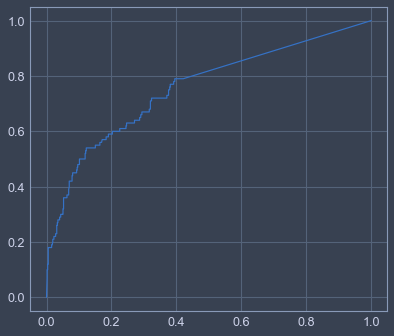

In [120]:
plt.plot(fprKNN, tprKNN)

In [121]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clfRandomForest = RandomForestClassifier()
paramGrid = {
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'log2'],
}
gridSearch = GridSearchCV(clfRandomForest, param_grid=paramGrid, cv=cv)

In [122]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'log2'],
                         'n_estimators': range(50, 300, 50)})

In [123]:
print(gridSearch.best_estimator_)
clfRandomForest = gridSearch.best_estimator_

RandomForestClassifier(n_estimators=50)


In [124]:
clfRandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [125]:
y_prob = clfRandomForest.predict_proba(X_test)
fprRandomForest, tprRandomForest, _ = roc_curve(y_test, y_prob[:, 1])

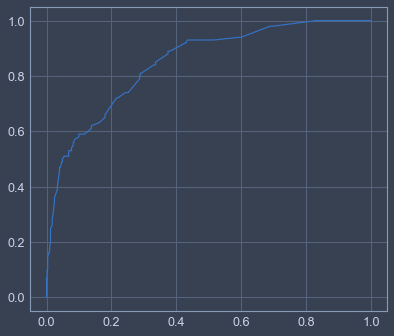

In [126]:
plt.plot(fprRandomForest, tprRandomForest)

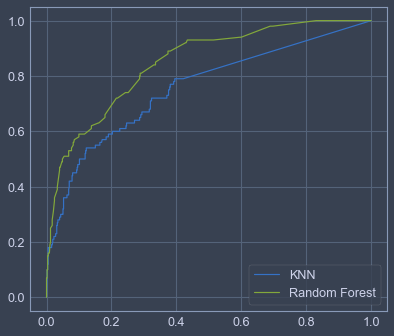

In [127]:
plt.plot(fprKNN, tprKNN, label='KNN')
plt.plot(fprRandomForest, tprRandomForest, label='Random Forest')
plt.legend();

In [128]:
tprKNN.shape

(110,)

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [129]:
X_train = X_train.copy()

In [130]:
X_train['KidsTotal'] = X_train.Kidhome + X_train.Teenhome

In [131]:
X_train.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer,KidsTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
10821,0.767373,1,1,-0.141918,-0.362341,-0.560857,-0.593579,-0.687068,-0.607273,-0.038766,1.902365,-0.030532,-0.568720,-0.243114,0.693904,0,0,0,1,0,0,1,0,0,False,2
5680,1.268149,1,0,0.583321,-0.873451,-0.560857,-0.708794,-0.687068,-0.510354,-0.786526,-0.685887,-1.110409,-0.910898,-0.858455,0.281720,0,1,0,0,0,0,1,0,0,False,1
4084,0.516985,0,1,-0.280059,-0.237535,3.236495,-0.052955,2.828335,1.597650,0.191314,-0.168236,0.689386,0.457817,1.602907,-0.542647,0,0,0,1,0,0,0,0,1,False,1
6983,-1.569584,1,1,-0.867157,-0.834821,-0.611153,-0.664481,-0.650449,-0.631503,-0.844046,-0.168236,-0.750450,-0.910898,-0.858455,0.693904,0,0,0,0,1,0,0,1,0,False,2
8233,-1.569584,0,1,-1.385184,0.606392,-0.535709,-0.646755,-0.558902,-0.534583,-0.652312,0.867064,1.049345,0.115638,0.372226,-0.130463,0,0,0,0,1,0,0,1,0,False,1


In [132]:
# Was there any activity recently? Or he just vanished one day?
X_train['Recent_Activity'] =\
    (X_train.Recency > X_train.Recency.mean()) |\
    X_train.Complain |\
    X_train.recent_customer

In [133]:
X_train.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer,KidsTotal,Recent_Activity
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10821,0.767373,1,1,-0.141918,-0.362341,-0.560857,-0.593579,-0.687068,-0.607273,-0.038766,1.902365,-0.030532,-0.568720,-0.243114,0.693904,0,0,0,1,0,0,1,0,0,False,2,False
5680,1.268149,1,0,0.583321,-0.873451,-0.560857,-0.708794,-0.687068,-0.510354,-0.786526,-0.685887,-1.110409,-0.910898,-0.858455,0.281720,0,1,0,0,0,0,1,0,0,False,1,True
4084,0.516985,0,1,-0.280059,-0.237535,3.236495,-0.052955,2.828335,1.597650,0.191314,-0.168236,0.689386,0.457817,1.602907,-0.542647,0,0,0,1,0,0,0,0,1,False,1,False
6983,-1.569584,1,1,-0.867157,-0.834821,-0.611153,-0.664481,-0.650449,-0.631503,-0.844046,-0.168236,-0.750450,-0.910898,-0.858455,0.693904,0,0,0,0,1,0,0,1,0,False,2,False
8233,-1.569584,0,1,-1.385184,0.606392,-0.535709,-0.646755,-0.558902,-0.534583,-0.652312,0.867064,1.049345,0.115638,0.372226,-0.130463,0,0,0,0,1,0,0,1,0,False,1,False


In [134]:
X_test = X_test.copy()

In [135]:
X_test['KidsTotal'] = X_test.Kidhome + X_test.Teenhome

In [136]:
X_test['Recent_Activity'] =\
    (X_test.Recency > X_test.Recency.mean()) |\
    X_test.Complain |\
    X_test.recent_customer

### Q5.2

Train an xboost model with f1 score 0.47+

In [1]:
import xgboost as xgb

In [147]:
dataDM = xgb.DMatrix(X_train, label=y_train)

In [184]:
xg = xgb.XGBClassifier(
    colsample_bytree=.3,
    learning_rate=.15,
    max_depth=10,
    alpha=.1,
    n_estimators=150,
)

In [185]:
xg.fit(X_train, y_train)

[22:51:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kuzne\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [186]:
y_pred = xg.predict(X_test)

In [187]:
f1_score(y_test, y_pred)

0.47297297297297297